### Wczytanie zbioru danych

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315', 'Proline'
]
 
data = pd.read_csv("Dane/wine.data", header=None, names=column_names)

In [3]:
display(data.head(10))

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### Podział na zbiór treningowy i testowy

In [4]:
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Normalizacja danych

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kiedy normalizujemy dane (np. za pomocą StandardScaler), uczymy skalera (czyli liczymy średnią i odchylenie standardowe) tylko na danych treningowych (fit() na X_train).

Następnie, do danych testowych stosujemy transform(), a nie fit_transform(), czyli stosujemy tę samą skalę, którą poznaliśmy na zbiorze treningowym.

Dzięki temu nasz model nie “zagląda” do danych testowych, co jest kluczowe, by wynik testowy był wiarygodny.

##### **Normalizacja danych** to proces przekształcania wartości cech tak, aby miały porównywalną skalę. Jest to szczególnie istotne w przypadku algorytmów, które opierają się na obliczaniu odległości między punktami, takich jak KNeighborsClassifier. Bez normalizacji cechy o większych wartościach mogłyby zdominować obliczenia odległości, co prowadziłoby do błędnych wyników.

Dzięki normalizacji:
* model nie faworyzuje cech o większym zakresie wartości,

* poprawia się wydajność i dokładność algorytmów zależnych od skali,

* proces uczenia staje się bardziej stabilny i szybszy.

**W kontekście zadania**: normalizacja pozwala obu algorytmom – KNN i Random Forest – działać efektywniej, przy czym szczególne znaczenie ma dla KNN, który mocno polega na metryce odległości.

### Trening modeli
##### KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

##### RandomForestClassifier

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train) # RandomForestClassifier nie wymaga skalowania danych

RandomForestClassifier(random_state=42)

Modele takie jak Random Forest działają na zasadzie podziału danych na podstawie progów wartości cech (np. "czy cecha > 3.5"), a nie na podstawie obliczania odległości euklidesowych (jak KNN).

### Klasyfikacja

In [8]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)


### Metryki

__accuracy__ (dokładność) - procent poprawnych predykcji, stosunek dobrze dokonanych klasyfikacji do ilości wszystkich dokonanych klasyfikacji - dobre kiedy klasy są zrównoważone.

__precision__ (precyzja) - mówi w jakim stopniu możemy zaufać naszym pozytywnym predykcjom w danej klasie, czyli ile z przewidzianych przykładów danej klasy było poprawnych.

__recall__ (czułość) - dowiadujemy sie ile obserwacji zgubiliśmy dla danej klasy - ile z rzeczywistych przykładów danej klasy zostało poprawnie wykrytych.

__F_measures__ - __F1_score__ - Średnia harmoniczna precyzji i recallu – użyteczna przy nierównowadze klas. W ten sposób uzyskujemy jedną liczbę (między 1 a 0, gdzie 1 jest sytuacją najlepszą), która równomiernie uwzględnia precision i recall.

__confusion_matrix__ - Macierz, która pokazuje liczbę prawidłowych i błędnych predykcji dla każdej klasy.

__classification_report__ - Zestawienie wszystkich metryk (precision, recall, f1-score, support) dla każdej klasy w formie tekstowego raportu.

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [10]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



🔹 KNeighborsClassifier
* Accuracy: 0.94

* Dla klasy 2, recall wynosi tylko 0.86, co oznacza, że model nie rozpoznaje wszystkich przykładów tej klasy poprawnie – część jest klasyfikowana błędnie.

* Precision klasy 3 to 0.83, co oznacza, że spośród próbek sklasyfikowanych jako 3, część była błędna.

🔹 RandomForestClassifier
* Accuracy: 1.00 (100% poprawnych predykcji)

* Wszystkie klasy mają precision, recall i f1-score równe 1.00 – model perfekcyjnie rozpoznaje wszystkie próbki.

* Jest mniej podatny na przeuczenie niż pojedyncze drzewa i zwykle bardziej odporny na zakłócenia.

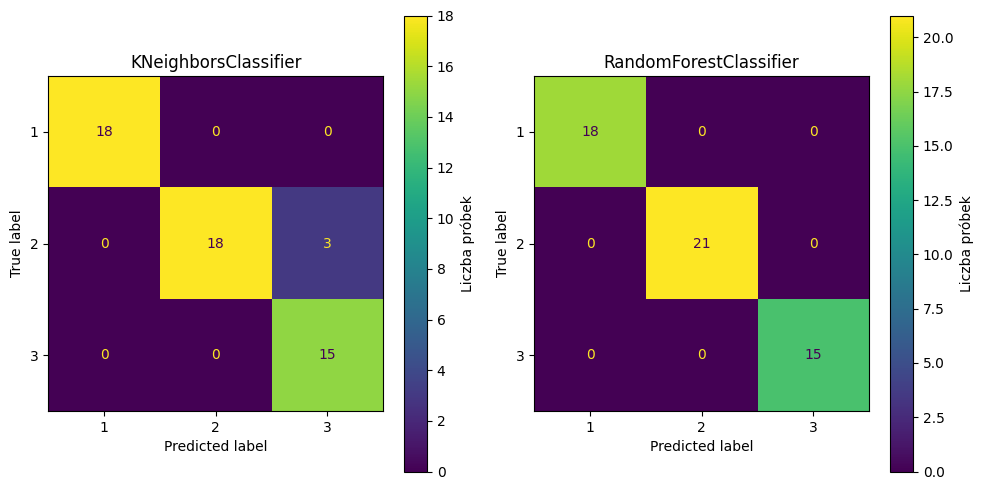

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# KNN
cm1 = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=knn.classes_)
im1 = disp1.plot(ax=axs[0], colorbar=False).im_
fig.colorbar(im1, ax=axs[0]).set_label("Liczba próbek")

# RF
cm2 = confusion_matrix(y_test, y_pred_rf, labels=knn.classes_)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=knn.classes_)
im2 = disp2.plot(ax=axs[1], colorbar=False).im_
fig.colorbar(im2, ax=axs[1]).set_label("Liczba próbek")

axs[0].set_title("KNeighborsClassifier")
axs[1].set_title("RandomForestClassifier")

plt.tight_layout()
plt.show()


* KNN nie uczy się globalnego modelu – każda predykcja zależy tylko od sąsiadów. Gdy próbki klas są lokalnie podobne, model może się mylić.

* Random Forest tworzy struktury umożliwiające lepsze rozdzielenie klas nawet w trudnych przypadkach, dlatego poradził sobie bezbłędnie.